# 콘크리트 데이터셋을 활용한 데이터 분석 및 인공지능 기초 실습
---

## 콘크리트 배합 데이터셋

페이스북, 인스타그램, 스레드로 유명한 기업 Meta에서는 강하고 친환경적인 콘크리트를 생산하는 인공지능 모델을 만들어 탄소 배출량을 40% 줄였다고 발표하였습니다.
* https://www.engadget.com/metas-newest-ai-discovers-stronger-and-greener-concrete-formulas-190001332.html

이 뉴스를 잘 읽어보면 메타는 인공지능 모델을 학습시키기 위해 1030개의 콘크리트 배합 데이터를 활용했다고 합니다.

실습 목표 : 어떤 데이터가 콘크리트 강도에 영향을 미치는지 분석

In [ ]:
# library install
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

concrete_data.csv 로드 후 con_df에 저장

In [ ]:
con_df=pd.read_csv("concrete_data.csv")
con_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<Column별 의미>\
Cement: 시멘트의 양\
Blast Furnace Slag: 슬래그미분말(제철작업에서 발생하는 부산물을 분쇄한 것)\
Fly Ash: 플라이애시(화력 발전소에서 보일러의 연소 가스 중의 미분탄 회분을 포집한 것)\
Water: 물의 양\
Super-plasticizer: 감수제(수분함량이 적은 콘크리트 제작을 위한 첨가제)\
Coarse Aggregate: 굵은 골재\
Fine Aggregate: 잔골재\
Age: 숙성 정도\
\
Strength: 콘크리트의 강도

<도메인 지식>

콘크리트의 인장강도의 단위는 MPa(메가파스칼)로, 1 MPa는 제곱센티미터당 10 kg 의 하중을 견딜 수 있음.

콘크리트의 경우 기둥이나 기초 등 활용되는 부분이나 건물의 높이에 따라 활용되는 인장강도가 다름.

경우에 따라 약간씩 다르지만, 일반적으로 Strength 값이 27 또는 30 이상이면 최소 설계기준압축강도를 충족함

KDS 14 20 40 : 2021, "콘크리트구조 내구성 설계기준", https://www.kira.or.kr/bbs/download.do?fId=118651&dFlag=1

In [ ]:
con_df.head(20)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


데이터 전체에 대한 정보 확인

In [ ]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


age는 이산형, 나머지 변수는 연속형

데이터 전체에 대한 기술통계량 확인

In [ ]:
con_df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


슬라브, 보, 기둥에 활용되는 콘크리트를 주문했다고 가정하고 데이터에 "for_Pillar" 컬럼을 생성하여 27MPa 이상의 콘크리트는 적합, 미만은 부적합 으로 분류 진행.

In [ ]:
pillar_df = con_df.copy()

pillar_df["for_Pillar"]=pillar_df["Strength"].apply(lambda x: "적합" if x >= 27 else "부적합")
pillar_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,for_Pillar
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,적합
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,적합
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,적합
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,적합
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,적합
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,적합
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,적합
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,부적합
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,적합


'적합' 과 '부적합'을 기준으로 데이터 분리

In [ ]:
ok_df = pillar_df[pillar_df["for_Pillar"]=="적합"]
no_df = pillar_df[pillar_df["for_Pillar"]=="부적합"]
ok_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,for_Pillar
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,적합
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,적합
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,적합
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,적합
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,적합
...,...,...,...,...,...,...,...,...,...,...
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92,적합
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,적합
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,적합
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,적합


'적합'에 해당하는 데이터와 '부적합'에 해당하는 데이터 사이의 모평균 차이가 있는지 통계적으로 검정 (양측검정)

귀무가설 : '적합'과 '부적합'의 데이터 사이에는 평균의 차이가 없다.\
대립가설 : '적합'과 '부적합'의 데이터 사이에는 평균의 차이가 있다.

In [ ]:
for col in ok_df.columns:
  if col == 'Strength' or col == 'for_Pillar':
    continue
  g1 = ok_df[col].tolist()
  g2 = no_df[col].tolist()
  # 정규성 검정
  shapiro_ok = stats.shapiro(g1)[1]
  shapiro_no = stats.shapiro(g2)[1]
  # 정규성이 만족되면
  if shapiro_ok >= 0.05 and shapiro_no >= 0.05:
    bartlett = stats.bartlett(g1, g2)[1]
    # 등분산성이 만족되면
    if bartlett >= 0.05:
      p_val = stats.ttest_ind(g1, g2, equal_var = True, alternative='two-sided')[1]
    else:
      p_val = stats.ttest_ind(g1, g2, equal_var = False, alternative='two-sided')[1]
  else:
    p_val = stats.ranksums(g1, g2, alternative='two-sided')[1]
  if p_val >= 0.05:
    print(col, "변수에서는 차이가 없습니다. p-value:", p_val.round(3))
  else:
    print(col, "변수에서는 차이가 있습니다.", p_val.round(3))

Cement 변수에서는 차이가 있습니다. 0.0
Blast Furnace Slag 변수에서는 차이가 있습니다. 0.0
Fly Ash 변수에서는 차이가 없습니다. p-value: 0.612
Water 변수에서는 차이가 있습니다. 0.0
Superplasticizer 변수에서는 차이가 있습니다. 0.0
Coarse Aggregate 변수에서는 차이가 있습니다. 0.0
Fine Aggregate 변수에서는 차이가 있습니다. 0.0
Age 변수에서는 차이가 있습니다. 0.0


Fly_Ash를 제외한 나머지 변수들에서는 확실히 '적합'과 '부적합' 사이 모평균이 다르다는 사실이 통계적으로 유의함.

'적합'에 해당하는 데이터의 모평균보다 '부적합'에 해당하는 데이터의 모평균이 더 작은지 통계적으로 검정 (단측검정)

귀무가설 : '적합'과 '부적합'의 데이터 사이에는 모평균의 차이가 없거나 '부적합'이 더 클 것이다.\
대립가설 : '적합'보다 '부적합' 데이터의 모평균이 더 작을 것이다.

In [ ]:
for col in ok_df.columns:
  if col == 'Strength' or col == 'for_Pillar':
    continue
  g1 = ok_df[col].tolist()
  g2 = no_df[col].tolist()
  # 정규성 검정
  shapiro_ok = stats.shapiro(g1)[1]
  shapiro_no = stats.shapiro(g2)[1]
  # 정규성이 만족되면
  if shapiro_ok >= 0.05 and shapiro_no >= 0.05:
    bartlett = stats.bartlett(g1, g2)[1]
    # 등분산성이 만족되면
    if bartlett >= 0.05:
      p_val = stats.ttest_ind(g1, g2, equal_var = True, alternative='less')[1]
    else:
      p_val = stats.ttest_ind(g1, g2, equal_var = False, alternative='less')[1]
  else:
    p_val = stats.ranksums(g1, g2, alternative='less')[1]
  if p_val >= 0.05:
    print(col, "귀무 가설 채택. p-value:", p_val.round(3))
  else:
    print(col, "대립 가설 채택.", p_val.round(3))

Cement 귀무 가설 채택. p-value: 1.0
Blast Furnace Slag 귀무 가설 채택. p-value: 1.0
Fly Ash 귀무 가설 채택. p-value: 0.306
Water 대립 가설 채택. 0.0
Superplasticizer 귀무 가설 채택. p-value: 1.0
Coarse Aggregate 대립 가설 채택. 0.0
Fine Aggregate 대립 가설 채택. 0.0
Age 귀무 가설 채택. p-value: 1.0


Water, Coarse Aggregate, Fine Aggregate 는 대립 가설 채택.

'적합'에 해당하는 데이터의 모평균보다 '부적합'에 해당하는 데이터의 모평균이 더 큰지 통계적으로 검정 (단측검정)

귀무가설 : '적합'과 '부적합'의 데이터 사이에는 모평균의 차이가 없거나 '부적합'이 더 작을 것이다.\
대립가설 : '적합'보다 '부적합' 데이터의 모평균이 더 클 것이다.

In [ ]:
for col in ok_df.columns:
  if col == 'Strength' or col == 'for_Pillar':
    continue
  g1 = ok_df[col].tolist()
  g2 = no_df[col].tolist()
  # 정규성 검정
  shapiro_ok = stats.shapiro(g1)[1]
  shapiro_no = stats.shapiro(g2)[1]
  # 정규성이 만족되면
  if shapiro_ok >= 0.05 and shapiro_no >= 0.05:
    bartlett = stats.bartlett(g1, g2)[1]
    # 등분산성이 만족되면
    if bartlett >= 0.05:
      p_val = stats.ttest_ind(g1, g2, equal_var = True, alternative='greater')[1]
    else:
      p_val = stats.ttest_ind(g1, g2, equal_var = False, alternative='greater')[1]
  else:
    p_val = stats.ranksums(g1, g2, alternative='greater')[1]
  if p_val >= 0.05:
    print(col, "귀무 가설 채택. p-value:", p_val.round(3))
  else:
    print(col, "대립 가설 채택.", p_val.round(3))

Cement 대립 가설 채택. 0.0
Blast Furnace Slag 대립 가설 채택. 0.0
Fly Ash 귀무 가설 채택. p-value: 0.694
Water 귀무 가설 채택. p-value: 1.0
Superplasticizer 대립 가설 채택. 0.0
Coarse Aggregate 귀무 가설 채택. p-value: 1.0
Fine Aggregate 귀무 가설 채택. p-value: 1.0
Age 대립 가설 채택. 0.0


Blast Furnace Slag, Superplasticizer, Age는 대립가설 채택.

검정을 통한 분석결과, 적합과 부적합의 데이터 모평균에 차이가 있는 변수들이 존재한다.\
차이를 보인 변수 : Water, Coarse Aggregate, Fine Aggregate, Blast Furnace Slag, Superplasticizer, Age \
9개 중 6개의 변수들이 강도에 영향을 미치는 것으로 파악됨

각 컬럼들의 값 분포를 히스토그램으로 확인

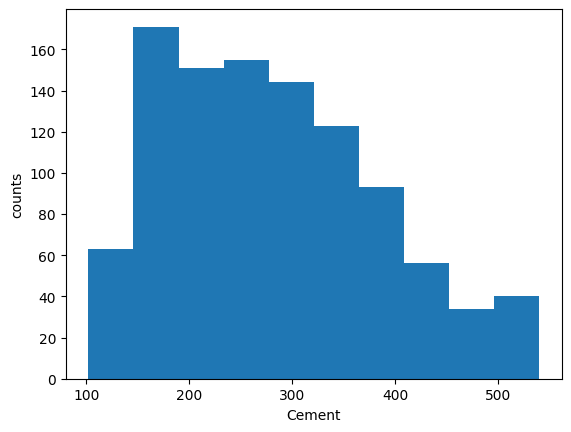

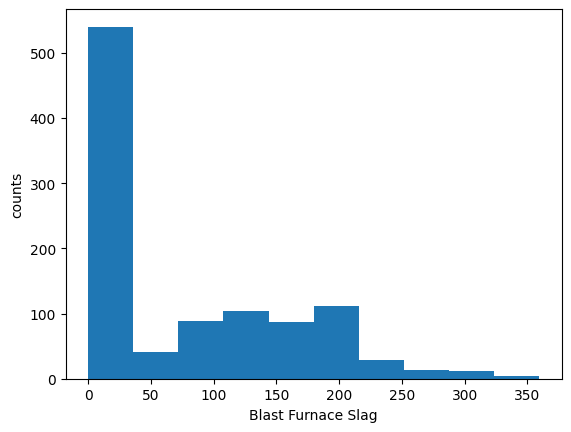

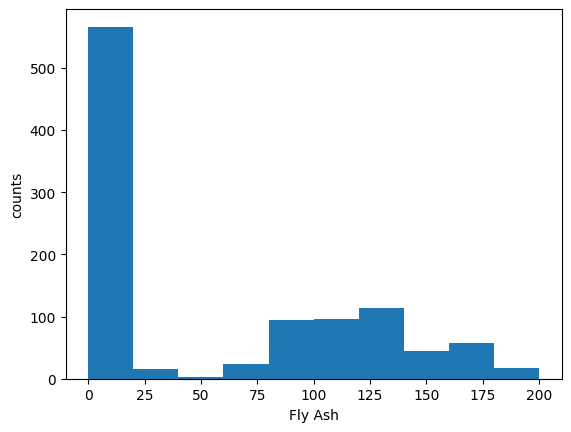

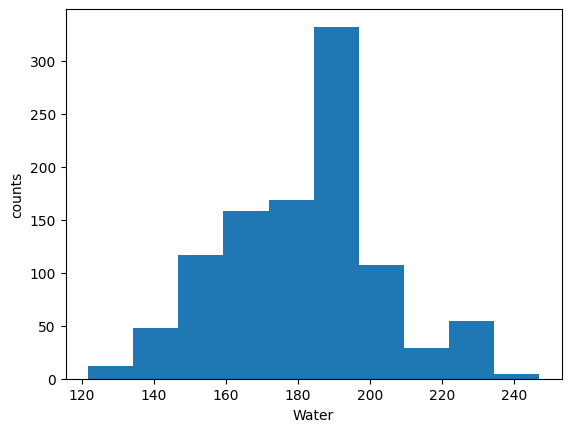

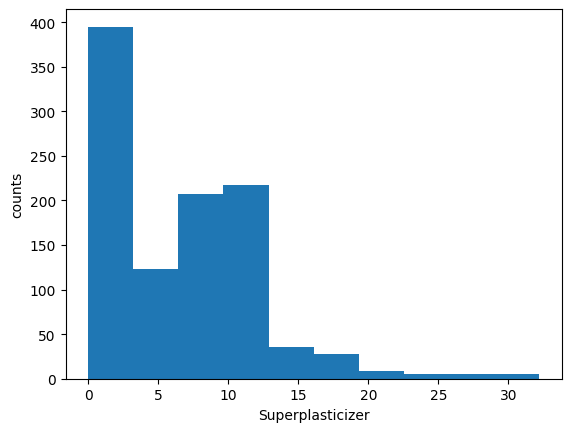

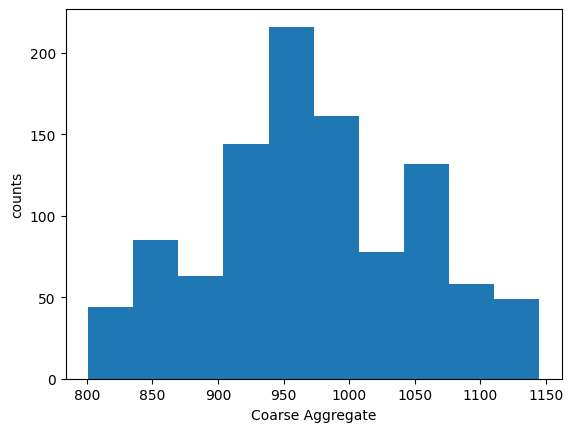

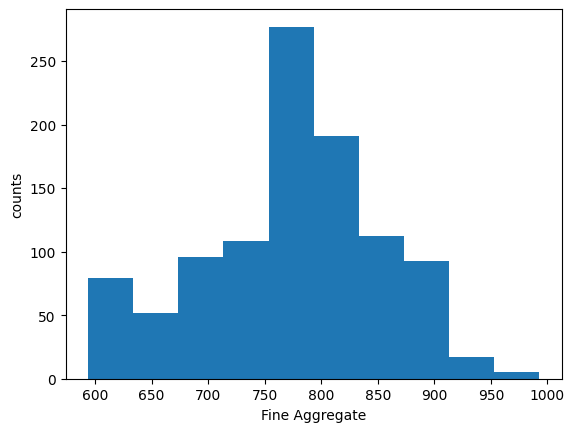

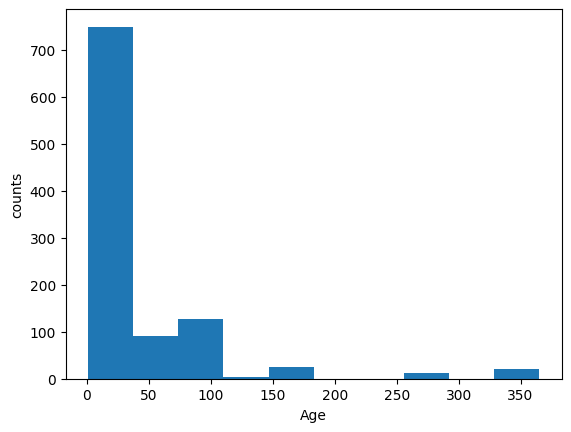

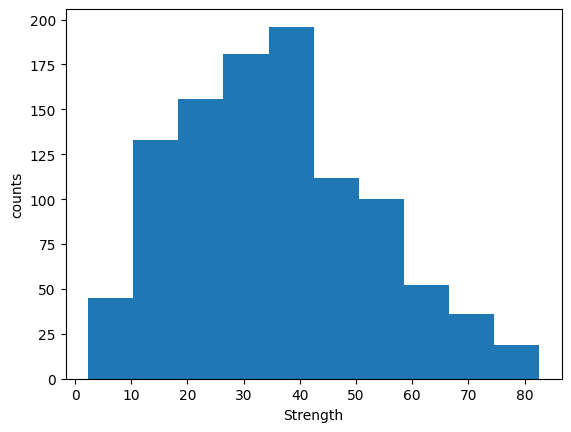

In [ ]:
for i in con_df.columns:
    plt.hist(con_df[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

Boxplot을 활용하여 각 데이터에서 이상치 탐지

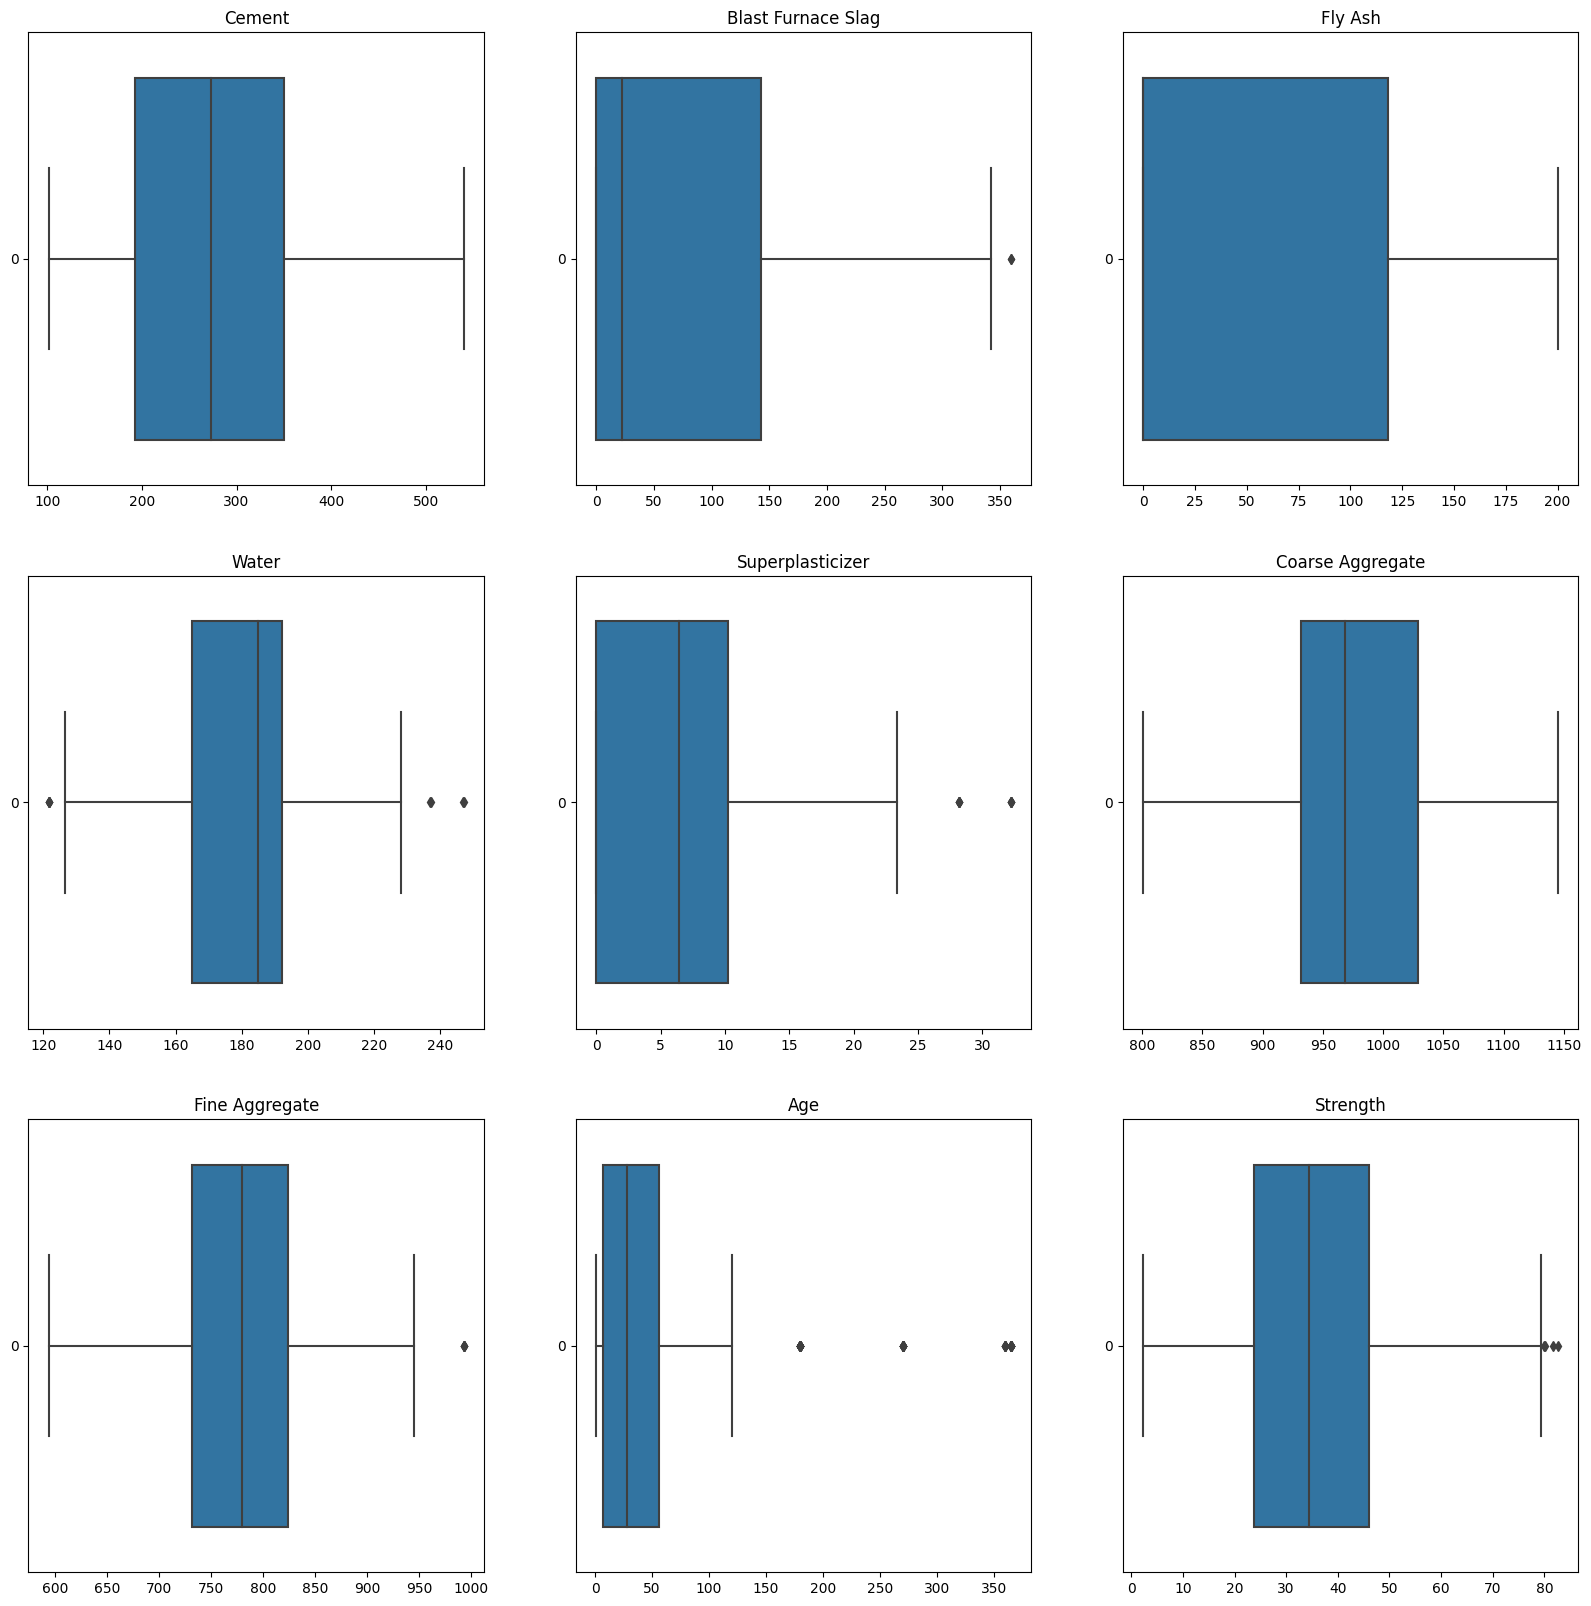

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (20,20));
col_cnt = 0
col_names = con_df.columns.tolist()
for a in range(3):
    for b in range(3):
        ax = sns.boxplot(con_df[col_names[col_cnt]], ax=axes[a][b], orient="h")
        ax.set_title(col_names[col_cnt])
        col_cnt += 1

In [ ]:
'''
[참고] boxplot 읽는 방법

     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
outlier           <----------->           outliers
                       IQR

Q1-1.5IQR 과 Q3+1.5IQR을 각각 최소값과 최대값이라 지칭하고, Q1과 최소값, Q3와 최대값 사이 거리를 나타내는 선을 수염 (whisker)이라 한다.
실제 도식은 d>=Q1-1.5IQR 중 최소인 점, d<=Q3+1.5IQR 중 최대인 점에 선을 긋는다.
'''

Boxplot상 몇 가지 데이터에서 이상치 존재. Water 데이터에서 이상치 먼저 확인

In [ ]:
Q1 = con_df["Water"].quantile(0.25)
Q3 = con_df["Water"].quantile(0.75)
IQR = Q3-Q1
con_df[(con_df["Water"] > (Q3 + 1.5*IQR)) | (con_df["Water"] < (Q1 - 1.5*IQR))]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


물의 양이 너무 많거나 적다고 해서 반드시 콘크리트의 인장강도에 문제가 생기는 것은 아니라는 사실을 파악 가능

측정 오류 등의 데이터는 아닌 것으로 보임

Age에 관하여 같은 이상치 확인 실시

In [ ]:
Q1 = con_df["Age"].quantile(0.25)
Q3 = con_df["Age"].quantile(0.75)
IQR = Q3-Q1
con_df[(con_df["Age"] > (Q3 + 1.5*IQR)) | (con_df["Age"] < (Q1 - 1.5*IQR))]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


Age가 너무 많다고 해서 콘크리트 강도에 영향을 미치는 것은 아니라는 사실을 알 수 있음.

[실습]\
Superplasticizer에 대해서도 이상치를 확인 후 콘크리트 강도에 영향을 미치는지를 확인해 보세요.

In [ ]:
Q1 = con_df["Superplasticizer"].quantile(0.25)
Q3 = con_df["Superplasticizer"].quantile(0.75)
IQR = Q3-Q1
con_df[(con_df["Superplasticizer"] > (Q3 + 1.5*IQR)) | (con_df["Superplasticizer"] < (Q1 - 1.5*IQR))]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


확인 결과, Strength의 수치들이 대체적으로 매우 높은 것으로 나타났음.

Age와 Strength간의 관계를 대략적으로 알아보기 위한 바이올린 플롯 도식화

<Axes: title={'center': 'Age vs Strength'}, xlabel='Age', ylabel='Strength'>

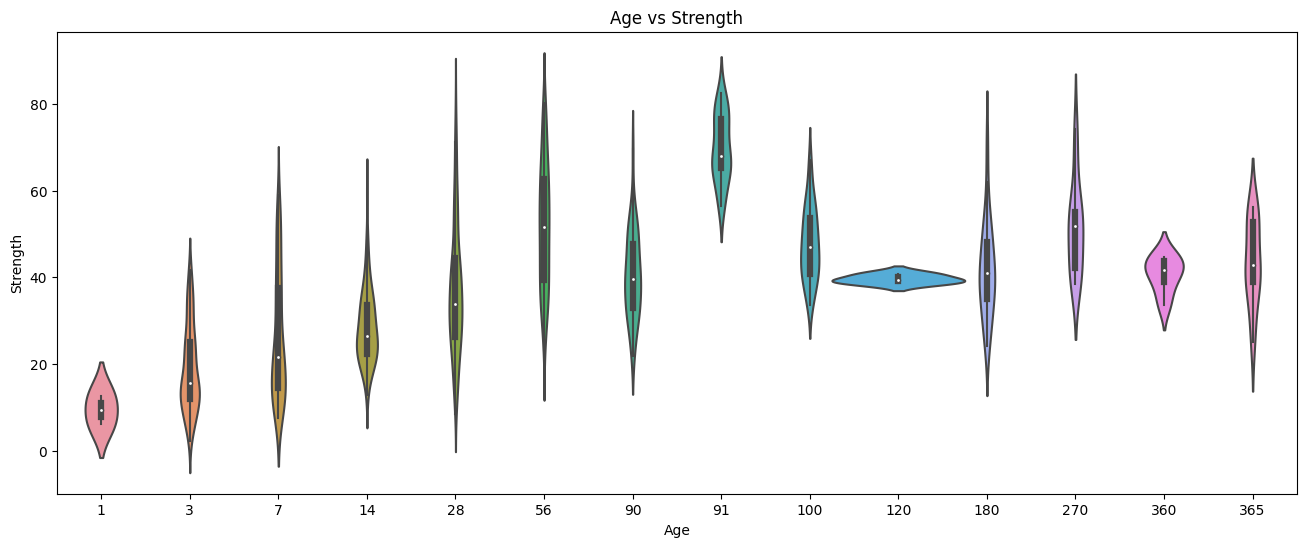

In [ ]:
plt.figure(figsize=(16, 6), label='Age vs Strength')
plt.title('Age vs Strength')
sns.violinplot(data=con_df, x="Age", y="Strength", width=1.5, )

몇몇 Age의 경우 특이한 분포를 가지는 것을 확인함.

Age가 너무 작은 데이터의 경우 많은 수가 최소설계기준압축강도 (27MPa)에 미치지 못함을 알 수 있음

jointplot을 활용해 Cement와 Strength 사이의 관계 확인

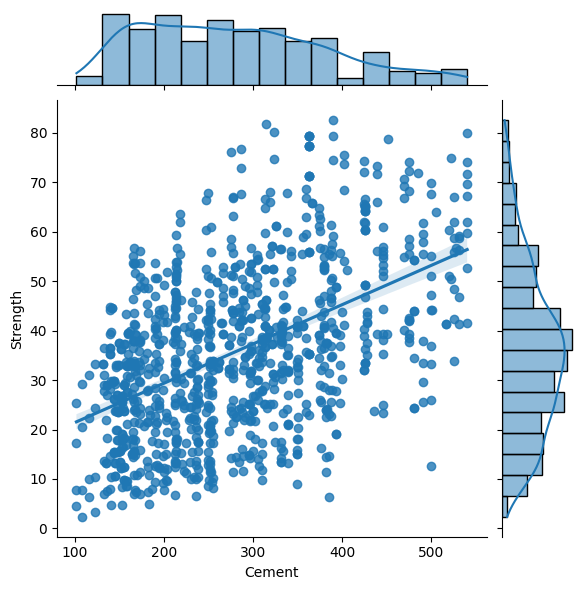

In [ ]:
sns.jointplot(x="Cement", y="Strength", data=con_df[["Cement", "Strength"]], kind="reg")

두 변수는 대체적으로 선형 관계를 가짐

pairplot을 활용해 전체 컬럼 사이의 관계를 점 그래프로 확인

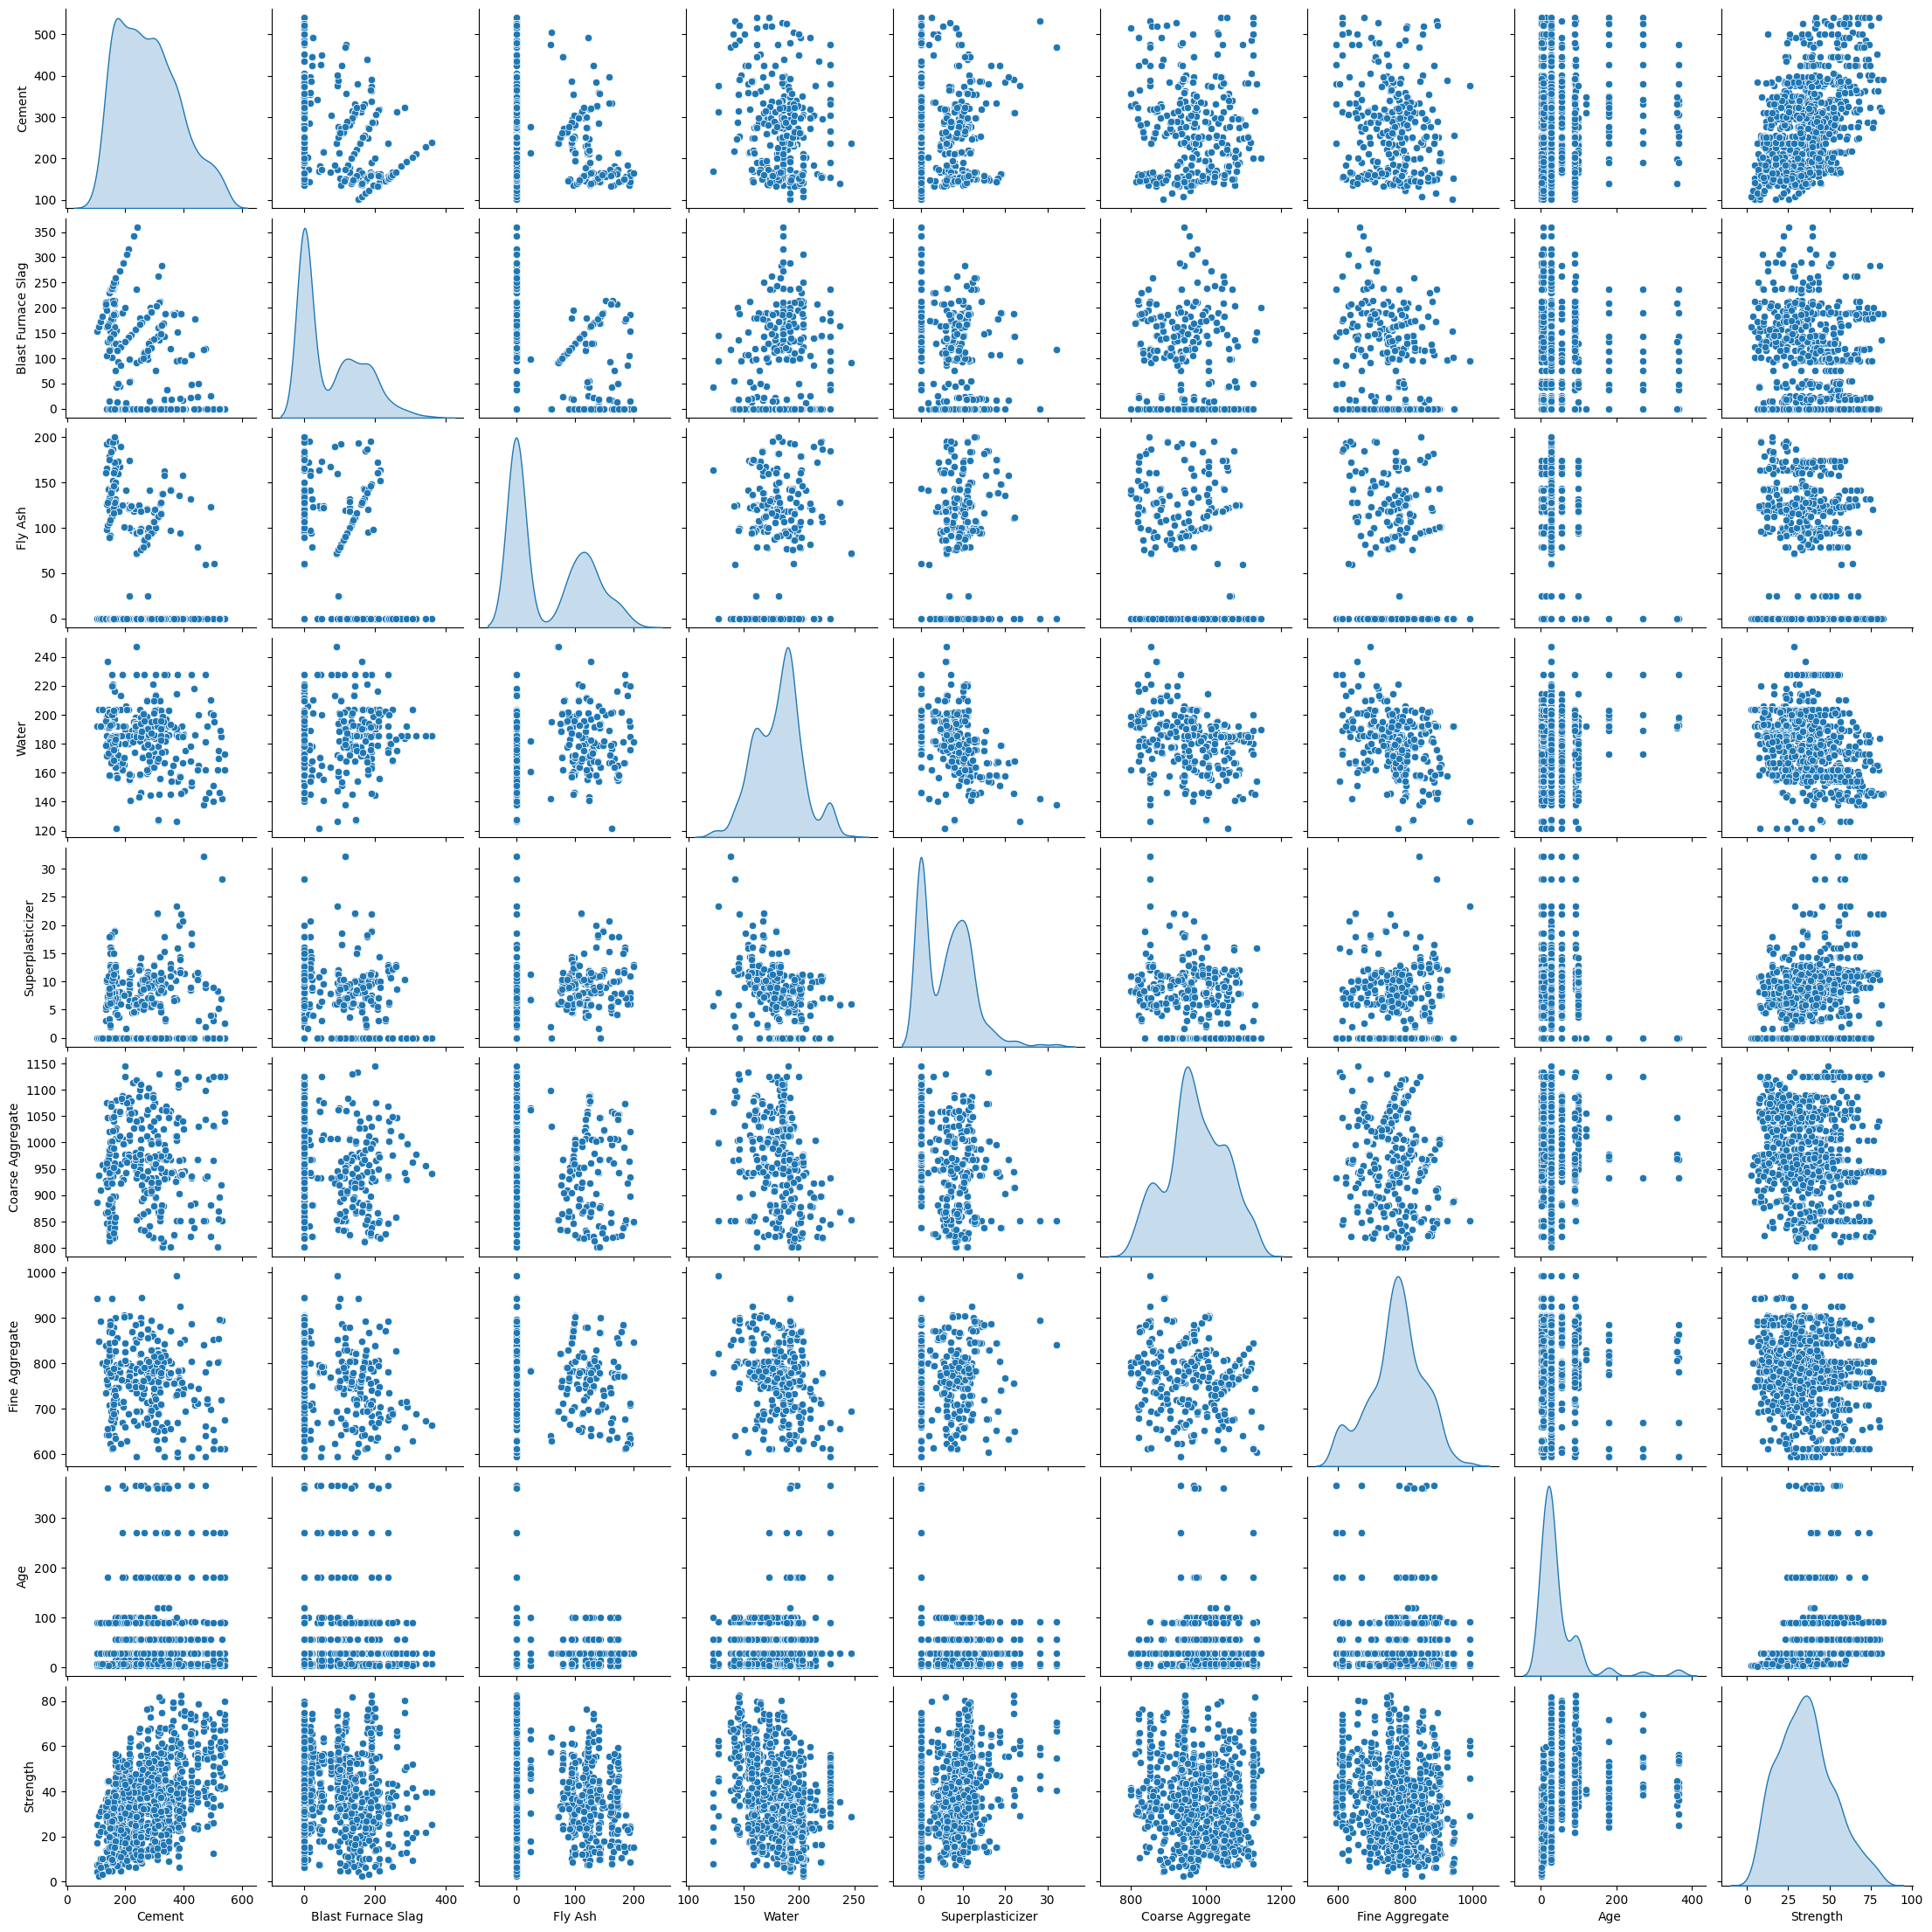

In [ ]:
sns.pairplot(con_df, diag_kind="kde");

위의 차트로 보았을 때, 데이터에 몇몇 컬럼 사이에는 특정 패턴이 존재함.

Cement의 양이 증가함에 따라 Slag나 Superplasticizer의 양은 증가하는 패턴을 확인할 수 있고, Fly ash는 반대로 음의 기울기를 가진 패턴을 확인 가능함. 시멘트의 양은 플라이애쉬의 양에 반비례

각 변수간의 상관관계를 한눈에 알아보기 위해 히트맵 도식화

<Axes: >

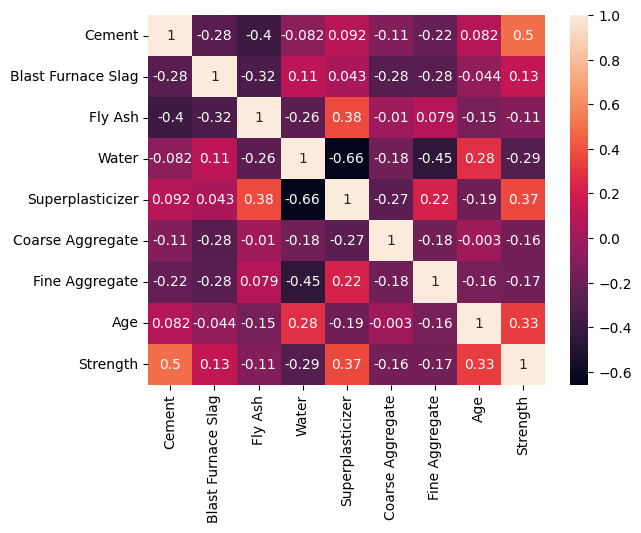

In [ ]:
sns.heatmap(con_df.corr(), annot=True)

강한 상관관계 : Water과 Superplasticizer, Cement와 Strength, Fine Aggregate와 Water, Superplasticizer와 Fly Ash, Cement와 Fly Ash

<참고: 도메인 지식>\
물과 Superplasticizer가 -0.66으로 높은 상관관계. Superplasticizer 자체가 물을 적게 활용하기 위해 넣는 첨가제이므로 당연한 결과.

데이터 분석 과정에서는 서로 다른 컬럼들의 데이터를 합쳐서 활용하는 경우도 있음.\
ex) 사람의 키와 몸무게 데이터를 합친 BMI 지표

도메인 지식을 활용하면, 콘크리트의 강도에는 시멘트와 물의 비율이 굉장히 중요함.

[실습]

Cement 컬럼의 값을 Water 컬럼 값으로 나누어 Cement_Water_Ratio 컬럼을 생성하고, Fine Aggregate와 Coarse Aggregate의 값을 합쳐서 Agg 컬럼을 생성해 주세요.\
이후 데이터프레임에서 Cement, Water, Coarse Aggregate, Fine Aggregate를 제거해 주시고 모든 변수간의 상관관계를 나타내는 heatmap을 그려주세요.

In [ ]:
df_temp = con_df.copy() # 이 데이터프레임에 진행해 주세요
df_temp["Cement_Water_Ratio"] = df_temp["Cement"]/df_temp["Water"]
df_temp["Agg"] = df_temp["Coarse Aggregate"] + df_temp["Fine Aggregate"]
df_temp.drop(columns=["Cement", "Water", "Coarse Aggregate", "Fine Aggregate"], inplace=True)
sns.heatmap(df_temp.corr(), fmt=".2g", annot=True)

<Axes: >

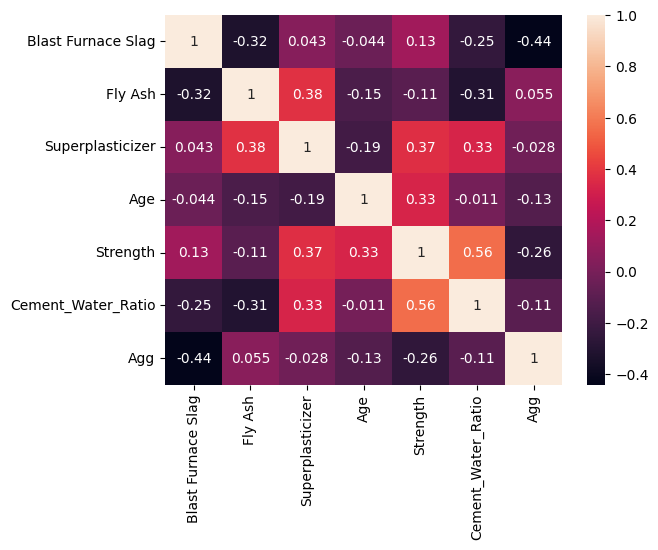

인장강도(Strength) 컬럼과 시멘트와 물의 비율(Cement_Water_Ratio) 컬럼의 상관계수가 0.56으로 높은 것을 확인. 그 외에 Age나 Superplasticizer도 꽤 높은 상관계수를 가짐.

Strength와 다른 변수들간의 상관관계를 그래프로 한눈에 알아보기 편하게 표현

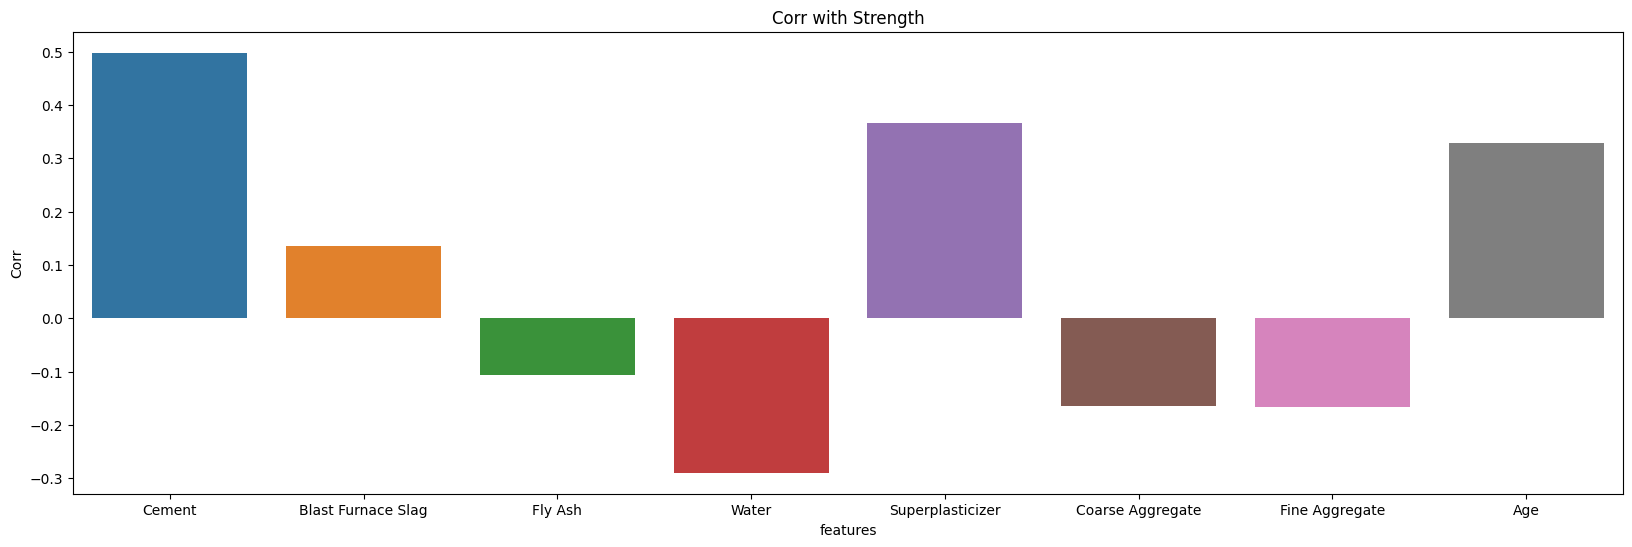

,Strength
Cement,0.497832
Blast Furnace Slag,0.134829
Fly Ash,-0.105755
Water,-0.289633
Superplasticizer,0.366079
Coarse Aggregate,-0.164935
Fine Aggregate,-0.167241
Age,0.328873


In [ ]:
corrMatrix = con_df[con_df.columns[0:]].corr()['Strength'][:-1].to_frame()

plt.figure(1,figsize =(20,6))
sns.barplot(x = corrMatrix.index,y = corrMatrix['Strength'],data = corrMatrix)
plt.title('Corr with Strength')
plt.ylabel('Corr')
plt.xlabel('features')
plt.show()
corrMatrix

Cement와 Superplasticizer, Age가 높은 양의 상관계수를 보이고 Water정도가 음의 상관계수를 보이는 것을 손쉽게 확인 가능

분석 결과

1. 시멘트와 물의 비율이 가장 중요하게 강도에 영향을 주고 있음 (물에 비해서 시멘트가 많아야 함)
2. 이외 Superplasticizer(첨가제)의 양이 많을 수록 강도가 단단해짐.
   - 첨가제와 물은 강한 음의 상관관계를 가지고 있어, 첨가제를 많이 넣을 수록 물의 양이 적어지며 강도가 높아지는 것으로 보임
3. Age와 강도도 양의 상관관계를 가지고 있어 기간이 길 수록 좀더 강도가 높다는 사실을 알 수 있음.
   - 다만 너무 Age가 작으면 최소 설계기준압축강도를 넘지 못하기 때문에 일정 일수 (약 30일) 이상의 양생 기간을 필수적으로 두어야 할 것으로 보임